
# **[2023-1] Image Processing & Vision (55397)**

* ### Hak Gu Kim
* ### Assistant Professor
* ### Graduate School of Advanced Imaging Science, Multimedia & Film (GSAIM)
* ### Chung-Ang University
* ### Webpage: www.irislab.cau.ac.kr


# **Homework I: Image Filtering**

* ### **Deadline:** 05 April (Wed) at 11:59pm
* ### **Submission:** Upload the zip file to "과제 및 평가" on E-class
  * **Upload zip file:** ipv23_hw01-student number.zip
    * **Python code:** ipv23_hw01-student number.ipynb
    * **Report:** ipv23_hw01-student number.pdf  (page limit: 4 pages)
  

## **[Homework I-0]** Environmental Setting

In [ ]:
# Connect to the google drive #

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Import the required libraries for image processing

import sys
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math

# Define the directory
dir = '/content/gdrive/My Drive/Colab Notebooks/IPV23_HW1/test imgs/' # File path

In [ ]:
# Define the functions for the load and save the input image

def loadImg(in_fname):
  img = cv2.imread(dir + in_fname)

  if img is None:
    print('Image load failed!')
    sys.exit()

  print(img.shape)
  cv2_imshow(img)

  return img  

## Save image file
def saveImg(out_img, out_fname):
  cv2.imwrite(dir + out_fname, out_img)

(512, 512, 3)


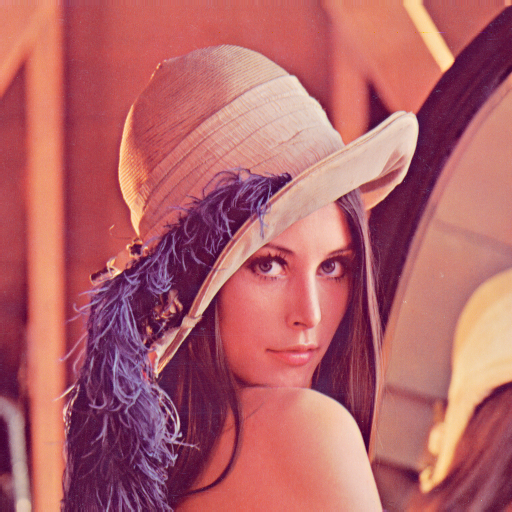

In [ ]:
# Example of File Load & Save

in_fname = 'lenna.png'
out_fname = 'output_lenna.png'

# Load and display the image
img = loadImg(in_fname)

# Save the image
saveImg(img, out_fname)

## **[Homework I-1]** Implement 2D Gaussian filtering

As a reference, a convolution operation was implemented (def conv).

As an example, mean filter was implemented with the defined convolution operation (def meanFilter).

Based on that, design a 2D Gaussian filter operation (gaussianFilter2D)

In [ ]:
##############################################
#            Convolution Operator            #
##############################################
def conv(image, filter):

  ih, iw, id = image.shape  # width, height, dimension of image
  fh, fw = filter.shape     # width, height of filter

  out = np.zeros((ih-fh+1,iw-fw+1,id))

  for d in range(id): # RGB channel
    for i in range(ih-fh+1):  # Vertical positions
      for j in range(iw-fw+1):  # Horizontal positions
        out[i,j,d] = np.sum(filter*image[i:i+fh, j:j+fw, d])

  if id == 1:
    return np.resize(out,(out.shape[0], out.shape[1])).astype(np.uint8)
  else:
    return out.astype(np.uint8)


##############################################
#                 Mean Filter                #
##############################################
def meanFilter(fsize):
  
  fsize_2d = (fsize, fsize)
  output_filter = np.ones(fsize_2d)

  output_filter = output_filter/np.sum(output_filter)

  return output_filter



##############################################
#             2D Gaussian Filter1            #
##############################################
def gaussianFilter2D(fsize, sigma):
  fsize_2d = (fsize, fsize)
  output_filter = np.zeros(fsize_2d)

  fcenter = fsize // 2
  # denominator of gaussian
  kernal_d = 2 * np.pi * sigma ** 2

  for h in range(fsize):
    x = h - fcenter
    for w in range(fsize):
      y = w - fcenter
      # numerator of gaussian
      kernal_n = np.exp(-1 * (x ** 2 + y ** 2) / (2 * (sigma ** 2)))
      output_filter[h, w] = kernal_n / kernal_d
      
  # normalization
  output_filter /= np.sum(output_filter)

  return output_filter
  
'''
##############################################
#             2D Gaussian Filter2            #
##############################################
def gaussianFilter2D(fsize, sigma):
  fsize_2d = (fsize, fsize)
  output_filter = np.zeros(fsize_2d)

  fcenter = fsize // 2
  # denominator of gaussian
  kernal_d = 2 * np.pi * sigma ** 2 

  # compute gaussian
  gaussian = np.arange(2 * fcenter ** 2 + 1)
  gaussian = np.exp(-1 * gaussian / (2 * (sigma ** 2))) / kernal_d

  for h in range(fsize):
    x = h - fcenter
    for w in range(fsize):
      y = w - fcenter
      output_filter[h, w] = gaussian[x ** 2 + y ** 2]

  # normalization
  output_filter /= np.sum(output_filter)

  return output_filter


##############################################
#             2D Gaussian Filter3            #
##############################################
def gaussianFilter2D(fsize, sigma):
  fcenter = fsize // 2
  filter_x = np.array([np.arange(-fcenter, fcenter + 1)])
  filter_y = np.transpose(filter_x)
  output_filter = filter_x ** 2 + filter_y ** 2

  # denominator of gaussian
  kernal_d = 2 * np.pi * (sigma ** 2)

  # compute gaussian
  gaussian = np.arange(2 * fcenter ** 2 + 1)
  gaussian = np.exp(-1 * gaussian / (2 * (sigma ** 2))) / kernal_d

  output_filter = gaussian[output_filter]
  
  # normalization
  output_filter /= np.sum(output_filter)

  return output_filter
'''

(512, 512, 3)


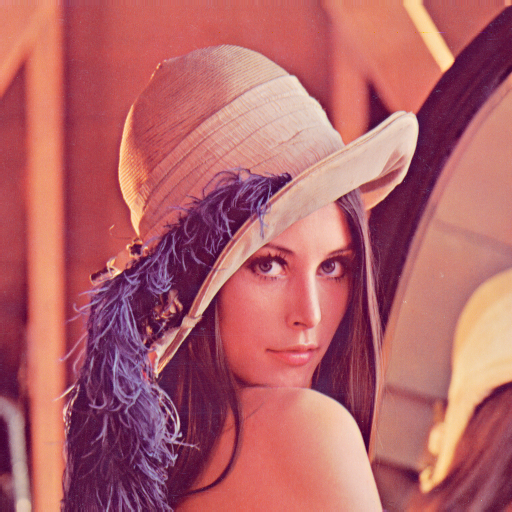

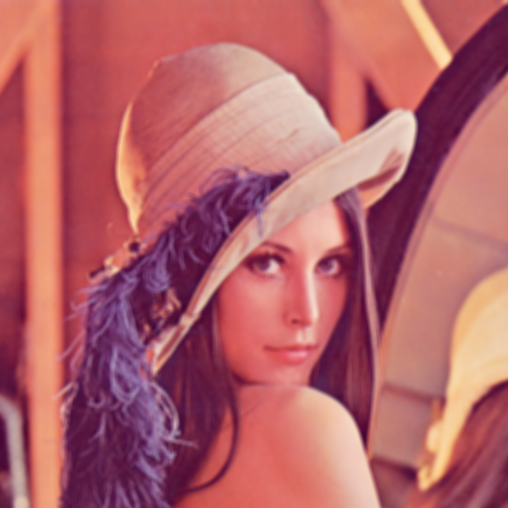

In [ ]:
##############################################
#           Main Function for HW01-1         #
##############################################

img = loadImg('lenna.png')

fsize = 5 # variable filter size
sigma = 5 # variable variation

gaussian_filter = gaussianFilter2D(fsize, sigma)
out_gaussian = conv(img, gaussian_filter)

cv2_imshow(out_gaussian)

saveImg(out_gaussian, '2d_gauss_lenna.png')

## **[Homework I-2]** Implement Separable Gaussian with 1D filter

Design a Separable Gaussian filter operation (gaussianFilter1D)

In [ ]:
##############################################
#          Separable Gaussian Filter1        #
##############################################
def gaussianFilter1D(fsize, sigma):
  output_filter = np.zeros((fsize, 1))
  
  fcenter = fsize // 2

  # denominator of gaussian
  kernal_d = np.sqrt(2 * np.pi) * sigma

  for i in range(fsize):
    x = i - fcenter
    # numerator of gaussian
    kernal_n = np.exp(-1 * (x ** 2) / (2 * (sigma ** 2)))
    output_filter[i] = kernal_n / kernal_d
      
  # normalization
  output_filter /= np.sum(output_filter)
  
  return output_filter

'''
##############################################
#          Separable Gaussian Filter2        #
##############################################
def gaussianFilter1D(fsize, sigma):
  fcenter = fsize // 2
  output_filter = np.array([np.arange(-fcenter, fcenter + 1) ** 2])

  # denominator of gaussian
  kernal_d = np.sqrt(2 * np.pi) * sigma 

  # compute gaussian
  gaussian = np.arange(fcenter ** 2 + 1)
  gaussian = np.exp(-1 * gaussian / (2 * (sigma ** 2))) / kernal_d

  output_filter = gaussian[output_filter]
  
  # normalization
  output_filter /= np.sum(output_filter) 
  
  return output_filter
'''

(512, 512, 3)


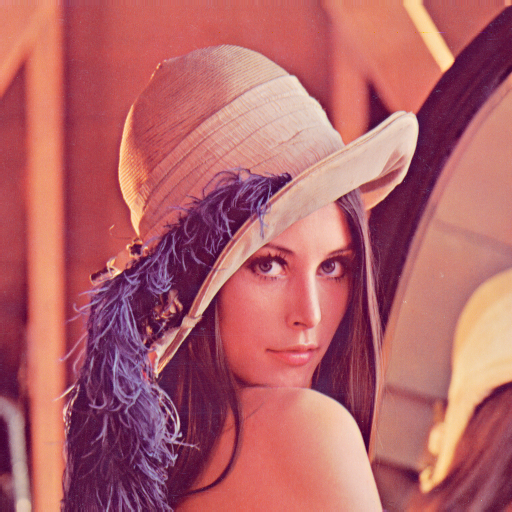

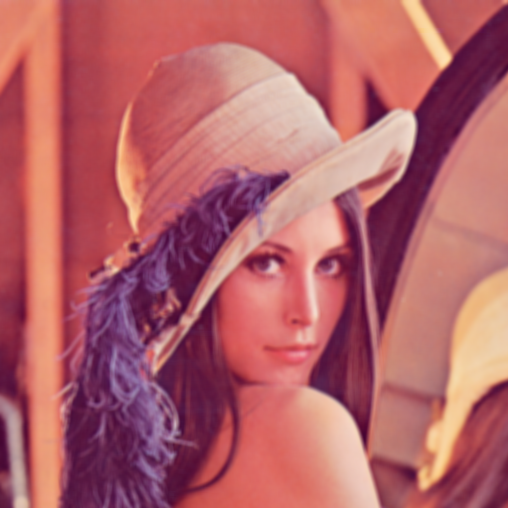

In [ ]:
##############################################
#           Main Function for HW01-2         #
##############################################

img = loadImg('lenna.png')

fsize = 5 # variable filter size
sigma = 5 # variable variation

gaussian_filter_v = gaussianFilter1D(fsize, sigma)
gaussian_filter_h = np.transpose(gaussian_filter_v)

out_gaussian = conv(img, gaussian_filter_v)
out_gaussian = conv(out_gaussian, gaussian_filter_h)

cv2_imshow(out_gaussian)

saveImg(out_gaussian, 'sep_gauss_lenna.png')